# Aula 6

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import ticker

In [2]:
@ticker.FuncFormatter
def billion_formatter(x, pos):
    '''
    Formata os dados para cada Milhão e mostra duas casas decimais depois da vírgula
    '''
    return "%.2f Bi" % (x/1E9)

In [3]:
mensal = pd.read_csv('https://raw.githubusercontent.com/Pedro-correa-almeida/Bootcamp_alura/main/Modulo_2/dados/dados_aula5', index_col=0, parse_dates=['data'])
mensal

,data,uf,gasto,mes,ano,gasto_diario,mes_nome
0,2008-02-01,Rondônia,2931283.42,2,2008,1.046887e+05,Fev
1,2008-03-01,Rondônia,1541682.52,3,2008,4.973169e+04,Mar
2,2008-04-01,Rondônia,1525314.96,4,2008,5.084383e+04,Abr
3,2008-05-01,Rondônia,1645953.84,5,2008,5.309529e+04,Mai
4,2008-06-01,Rondônia,1406150.68,6,2008,4.687169e+04,Jun
...,...,...,...,...,...,...,...
4261,2020-11-01,Distrito Federal,20459325.27,11,2020,6.819775e+05,Nov
4262,2020-12-01,Distrito Federal,22991567.76,12,2020,7.416635e+05,Dez
4263,2021-01-01,Distrito Federal,23527050.29,1,2021,7.589371e+05,Jan
4264,2021-02-01,Distrito Federal,22766952.62,2,2021,8.131055e+05,Fev


In [4]:
por_ano = mensal.groupby('ano').agg({'gasto':'sum'})
por_ano

,gasto
ano,
2008,7.877631e+09
2009,1.012492e+10
2010,1.074075e+10
2011,1.130841e+10
2012,1.165612e+10
2013,1.269836e+10
2014,1.337041e+10
2015,1.378798e+10
2016,1.400110e+10


## Desafio 01: Reordenar as cores pelo valor do eixo y

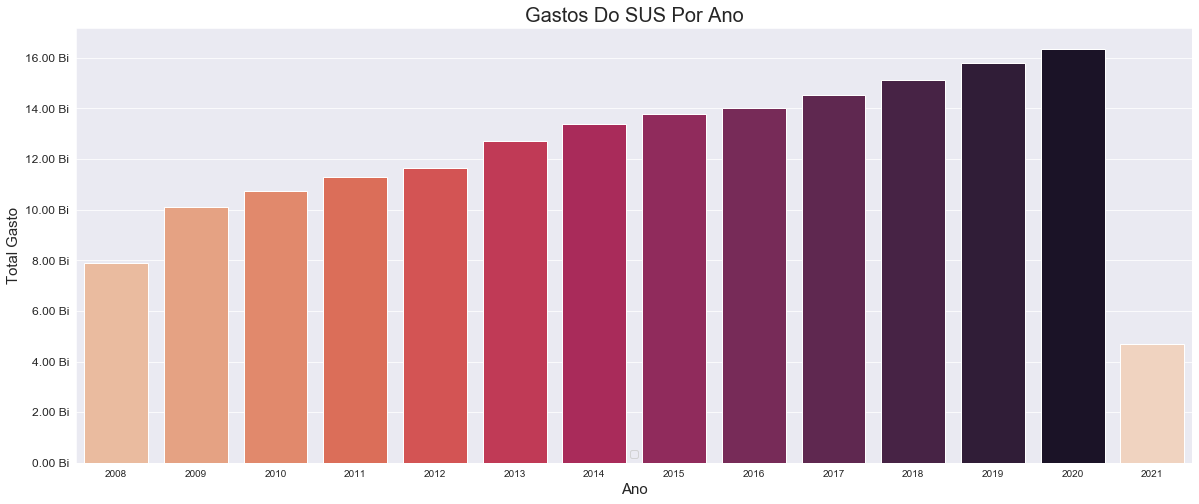

In [8]:
#Mudando o estilo de fundo
sns.set_style('darkgrid')

#Criando figura e eixos
fig, ax = plt.subplots(figsize=(20,8), sharex=True) 

#Criando o gráfico
sns.barplot(data=por_ano, x=por_ano.index, y='gasto', hue='gasto', dodge=False, palette=sns.color_palette('rocket_r',14))

#Plotando as legendas e mudando o tamanho das fontes
plt.title('Gastos Do SUS Por Ano', fontsize=20)
plt.xlabel('Ano', fontsize=15)
plt.ylabel('Total Gasto', fontsize=15)
plt.yticks(fontsize=12)
ax.yaxis.set_major_formatter(billion_formatter)
plt.legend('')

#Mostrando o gráfico
plt.show()